# Otimização do Algoritmo Genético BLF-GA para o Closest String Problem (CSP)

Este notebook tem como objetivo analisar, testar e otimizar o desempenho do algoritmo BLF-GA aplicado ao CSP, seguindo um processo iterativo de experimentação e melhoria.

# 1. Inicializar as configurações básicas

In [48]:
# Corrigindo o PYTHONPATH para permitir imports relativos ao projeto
import sys, os
sys.path.insert(0, os.path.abspath('..'))

## 2. Mapeamento dos Parâmetros do BLF-GA

A seguir, listamos todos os parâmetros configuráveis do BLF-GA, explicando o papel de cada um e seus valores padrão.

In [49]:
# Leitura dos parâmetros do BLF-GA
import pprint
with open('../algorithms/blf_ga/config.py', 'r', encoding='utf-8') as f:
    config_code = f.read()
print(config_code)

"""
Configurações padrão para o algoritmo BLF-GA.

Atributos:
    BLF_GA_DEFAULTS (dict): Parâmetros padrão do BLF-GA.
"""

# BLF-GA Configuration
BLF_GA_DEFAULTS = {
    'pop_size': 100,
    'initial_blocks': 20,
    'min_block_len': 3,
    'cross_prob': 2,
    'mut_prob': 0.9,
    'elite_rate': 0.05,
    'rediv_freq': 10,
    'max_gens': 30,
    'max_time': 60.0,
    'seed': None,
}



## 3 Parâmetros do Dataset e Algoritmo

Abaixo, você pode escolher entre usar os parâmetros padrão ou configurar manualmente tanto para o dataset sintético quanto para o algoritmo BLF-GA. Basta definir a opção desejada em cada bloco de parâmetros.

In [ ]:
# Parâmetros do dataset sintético: escolha entre padrão ou manual
from utils.config import SYNTHETIC_DEFAULTS

usar_dataset_padrao = True  # Altere para False para configuração padrão

if usar_dataset_padrao:
    # Parâmetros customizados (edite conforme necessário)
    n = 200 # Número de strings
    L = 1000 # Comprimento das strings
    alphabet = "ACGT" # Alfabeto
    noise = 0.2 # Proporção de mutações
    seed = 42 # Semente para reprodutibilidade
else:
    # Parâmetros padrão
    n = SYNTHETIC_DEFAULTS['n']
    L = SYNTHETIC_DEFAULTS['L']
    alphabet = SYNTHETIC_DEFAULTS['alphabet']
    noise = SYNTHETIC_DEFAULTS['noise']
    seed = None

print("Parâmetros do dataset:")
print(f" - n: {n}\n - L: {L}\n - alphabet: {alphabet}\n - noise: {noise}\n - seed: {seed}")

In [51]:
# Parâmetros do algoritmo BLF-GA: escolha entre padrão ou manual
usar_algoritmo_padrao = True # Altere para False para configuração customizada

from algorithms.blf_ga.config import BLF_GA_DEFAULTS

if usar_algoritmo_padrao:
    # Parâmetros customizados (exemplo, edite conforme necessário)
    params_iniciais = BLF_GA_DEFAULTS.copy()
    params_iniciais["pop_size"] = 100
    params_iniciais["cross_prob"] = 0.9
    params_iniciais["mut_prob"] = 0.8
    params_iniciais["elite_rate"] = 0.1
    params_iniciais["max_gens"] = 40
else:
    params_iniciais = BLF_GA_DEFAULTS.copy()

print("Parâmetros iniciais do BLF-GA:")
for k, v in params_iniciais.items():
    print(f" - {k}: {v}")

Parâmetros iniciais do BLF-GA:
 - pop_size: 100
 - initial_blocks: 20
 - min_block_len: 3
 - cross_prob: 0.9
 - mut_prob: 0.8
 - elite_rate: 0.1
 - rediv_freq: 10
 - max_gens: 40
 - max_time: 60.0
 - seed: None


# 3.1 Geração do Dataset Sintético

Abaixo será gerado um dataset sintético de strings para o Closest String Problem (CSP), utilizando os parâmetros definidos acima (número de strings, comprimento, alfabeto, nível de ruído e semente).

O objetivo é criar um conjunto de dados controlado e reprodutível para testar e comparar o desempenho do algoritmo BLF-GA.

In [52]:
# Gerar dataset sintético com os parâmetros definidos
import random
from typing import Optional

def gerar_dataset_teste(n, L, alphabet, noise, seed: Optional[int] = 42):
    rng = random.Random(seed) if seed is not None else random.Random()
    base_string = ''.join(rng.choices(alphabet, k=L))
    data = []
    for _ in range(n):
        s = list(base_string)
        num_mut = int(round(noise * L))
        mut_pos = rng.sample(range(L), num_mut) if num_mut > 0 else []
        for pos in mut_pos:
            orig = s[pos]
            alt = rng.choice([c for c in alphabet if c != orig])
            s[pos] = alt
        new_s = ''.join(s)
        data.append(new_s)
    return data, alphabet

strings, alphabet = gerar_dataset_teste(n=n, L=L, alphabet=alphabet, noise=noise, seed=seed)
print(f"Dataset gerado: n={len(strings)}, L={len(strings[0])}, |Σ|={len(alphabet)}")

Dataset gerado: n=200, L=100, |Σ|=4


## 4. Execução do BLF-GA com Parâmetros Iniciais

Vamos executar o BLF-GA com os parâmetros definidos e medir o desempenho (distância e tempo de execução).

Melhor string encontrada: GACAGGTACAAGAAGGAGTATGCATCAATGTGGTCGTGTGGAACAAACGCCACTGGAGACTGGGTTAACCATTCGCTCCAGCGTCATGAAAGTCACTGTT
Distância máxima: 10
Tempo de execução: 47.52 s


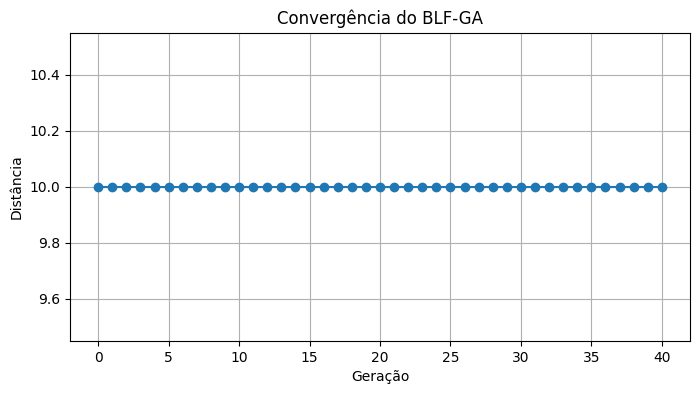

In [ ]:
# Execução do BLF-GA com histórico de convergência
import matplotlib.pyplot as plt
from algorithms.blf_ga.algorithm import BLFGAAlgorithm

def executar_blfga_com_hist(strings, alphabet, params):
    alg = BLFGAAlgorithm(strings, alphabet, **params)
    import time
    t0 = time.time()
    center, dist, history = alg.run_with_history()
    t1 = time.time()
    return center, dist, t1-t0, history

center, dist, tempo, history = executar_blfga_com_hist(strings, alphabet, params_iniciais)
print(f"Melhor string encontrada: {center}")
print(f"Distância máxima: {dist}")
print(f"Tempo de execução: {tempo:.2f} s")


In [ ]:
# Plotando o histórico de convergência
plt.figure(figsize=(8,4))
plt.plot(history, marker='o')
plt.xlabel('Geração')
plt.ylabel('Distância')
plt.title('Convergência do BLF-GA')
plt.grid(True)
plt.show()

## 9. Reexecução e Comparação dos Resultados

Executando novamente o BLF-GA com outros parametros para analise. 

In [ ]:
# Experimentos automáticos: variação de parâmetros do BLF-GA
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product

param_grid = {
    'pop_size': [50, 100, 200, 500],
    'cross_prob': [0.7, 0.9],
    'mut_prob': [0.1, 0.2, 0.3],
    'elite_rate': [0.05, 0.1, 0.2],
    'max_gens': [20],
}

# Gera todas as combinações
experimentos = list(product(*param_grid.values()))
resultados = []

for i, valores in enumerate(experimentos):
    params = params_iniciais.copy()
    for k, v in zip(param_grid.keys(), valores):
        params[k] = v
    center, dist, tempo, history = executar_blfga_com_hist(strings, alphabet, params)
    resultados.append({
        **{k: v for k, v in zip(param_grid.keys(), valores)},
        'dist': dist,
        'tempo': tempo,
        'history': history
    })
    print(f"Experimento {i+1}/{len(experimentos)}: dist={dist}, tempo={tempo:.2f}s, params={params}")


Experimento 1/48: dist=10, tempo=12.46s, params={'pop_size': 50, 'initial_blocks': 20, 'min_block_len': 3, 'cross_prob': 0.7, 'mut_prob': 0.7, 'elite_rate': 0.05, 'rediv_freq': 10, 'max_gens': 20, 'max_time': 60.0, 'seed': None}
Experimento 2/48: dist=10, tempo=24.32s, params={'pop_size': 50, 'initial_blocks': 20, 'min_block_len': 3, 'cross_prob': 0.7, 'mut_prob': 0.7, 'elite_rate': 0.05, 'rediv_freq': 10, 'max_gens': 40, 'max_time': 60.0, 'seed': None}
Experimento 2/48: dist=10, tempo=24.32s, params={'pop_size': 50, 'initial_blocks': 20, 'min_block_len': 3, 'cross_prob': 0.7, 'mut_prob': 0.7, 'elite_rate': 0.05, 'rediv_freq': 10, 'max_gens': 40, 'max_time': 60.0, 'seed': None}
Experimento 3/48: dist=10, tempo=11.86s, params={'pop_size': 50, 'initial_blocks': 20, 'min_block_len': 3, 'cross_prob': 0.7, 'mut_prob': 0.7, 'elite_rate': 0.1, 'rediv_freq': 10, 'max_gens': 20, 'max_time': 60.0, 'seed': None}
Experimento 3/48: dist=10, tempo=11.86s, params={'pop_size': 50, 'initial_blocks': 20

In [ ]:

# DataFrame para análise
res_df = pd.DataFrame(resultados)

# Plot comparativo das melhores convergências
plt.figure(figsize=(10,6))
for idx, row in res_df.iterrows():
    plt.plot(row['history'], label=f"{row['pop_size']},{row['cross_prob']},{row['mut_prob']},{row['elite_rate']},{row['max_gens']}")
plt.xlabel('Geração')
plt.ylabel('Distância')
plt.title('Convergência BLF-GA - Variação de Parâmetros')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

# Exibir top 5 melhores resultados
display(res_df.sort_values('dist').head())